<a href="https://colab.research.google.com/github/Saifullah785/hands-on-ml-notes-practice/blob/main/chapter_02_end_to_end_machine_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Print a welcome message
print('Welcome to Machine Learning!')

Welcome to Machine Learning!


In [3]:
# Import the sys module
import sys

# Assert that the Python version is 3.7 or higher
assert sys.version_info >=(3, 7)

In [4]:
# Import the version module from packaging
from packaging import version

# Import the sklearn library
import sklearn

# Assert that the sklearn version is 1.0.1 or higher
assert version.parse(sklearn.__version__) >= version.parse('1.0.1')

#**Get the Data**



#**Download the Data**

In [5]:
# Import necessary libraries
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import urllib.request

# Function to load housing data from a compressed file
def load_housing_data():
  # Define the path for the tarball file
  tarball_path = Path('datasets/housing.tgz')
  # Check if the tarball file exists
  if not tarball_path.is_file():
    # Create the datasets directory if it doesn't exist
    Path('datasets').mkdir(parents=True, exist_ok=True)
    # Define the URL for the housing data tarball
    url = 'https://github.com/ageron/data/raw/main/housing.tgz'
    # Download the tarball file
    urllib.request.urlretrieve(url, tarball_path)
  # Open the tarball file
  with tarfile.open(tarball_path) as housing_tarball:
    # Extract all files from the tarball to the datasets directory
    housing_tarball.extractall(path='datasets')
  # Read the housing.csv file into a pandas DataFrame
  return pd.read_csv(Path('datasets/housing/housing.csv'))

# Load the housing data into a DataFrame
housing = load_housing_data()

# **Take a Quick Look at the Data Structure**

In [6]:
# Display the first 5 rows of the housing DataFrame
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Display the shape (number of rows and columns) of the housing DataFrame
housing.shape

(20640, 10)

In [8]:
# Display information about the housing DataFrame, including data types and non-null counts
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Display the value counts for the 'ocean_proximity' column
housing['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [10]:
# Display descriptive statistics for the numerical columns in the housing DataFrame
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
# extra code - code to save the figures as high-res PNGs for the book

# Define the path to save images
IMAGES_PATH = Path() / "images" / "end_to_end_project"

# Create the images directory if it doesn't exist
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

# Function to save a figure
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
  # Define the path to save the figure
  path = IMAGES_PATH / f'{fig_id}.{fig_extension}'
  # Apply tight layout if specified
  if tight_layout:
    plt.tight_layout()
  # Save the figure
  plt.savefig(path, format=fig_extension, dpi=resolution)

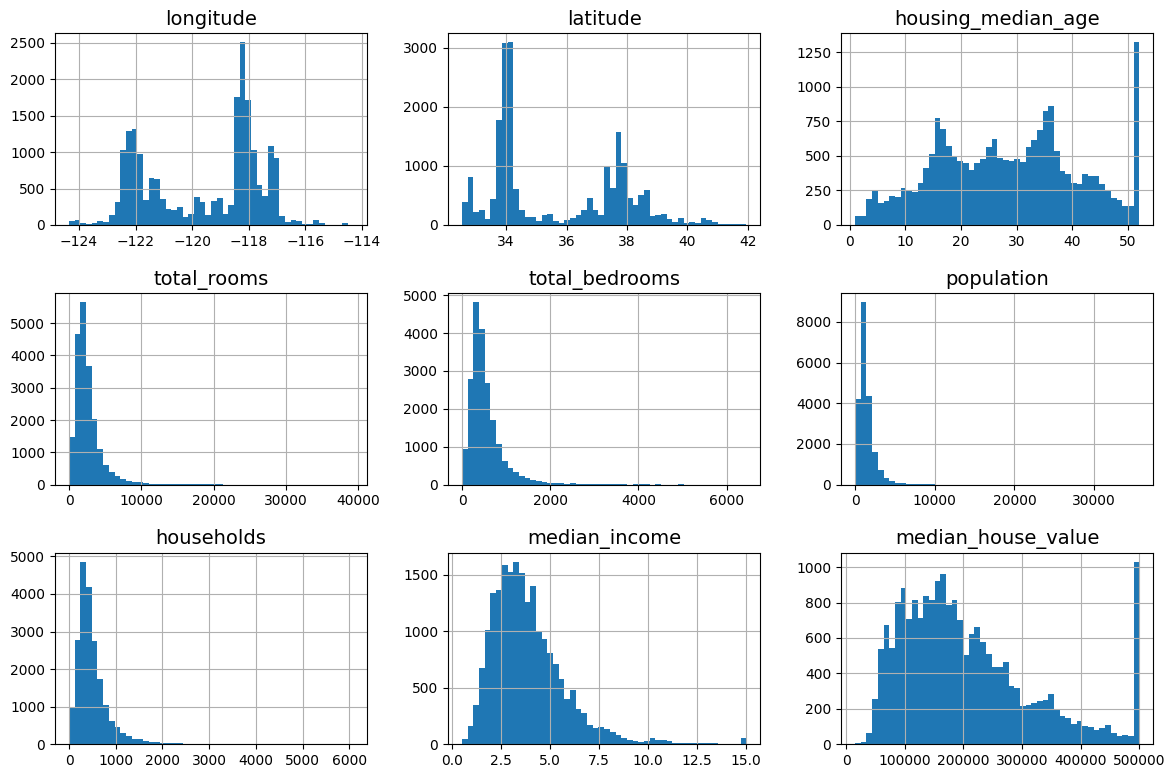

In [12]:
# extra code - the next 5 lines define the default font sizes

# Set default font sizes for plots
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Plot histograms for each numerical attribute in the housing DataFrame
housing.hist(bins=50, figsize=(12, 8))
# Save the figure
save_fig('attribute_histogram_plots')
# Show the plot
plt.show()

# **Create a Test Set**

In [13]:
# Import the numpy library
import numpy as np

# Function to shuffle and split data into training and test sets
def shuffle_and_split_data(data, test_ratio):
  # Generate a random permutation of indices
  shuffled_indices = np.random.permutation(len(data))
  # Calculate the size of the test set
  test_set_size = int(len(data) * test_ratio)
  # Get the indices for the test set
  test_indices = shuffled_indices[:test_set_size]
  # Get the indices for the training set
  train_indices = shuffled_indices[test_set_size:]
  # Return the training and test sets
  return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
# Split the housing data into training and test sets using the custom function
train_set, test_set = shuffle_and_split_data(housing, 0.2)
# Display the length of the training set
len(train_set)

16512

In [15]:
# Set the random seed for reproducibility for numpy
np.random.seed(42)

In [16]:
# Import the crc32 function from the zlib library
from zlib import crc32

# Function to check if an identifier is in the test set based on a hash
def is_id_in_test_set(identifier, test_ratio):
  # Calculate the crc32 hash of the identifier
  return crc32(np.int64(identifier)) < test_ratio * 2**32

# Function to split data into training and test sets using an ID hash
def split_data_with_id_hash(data, test_ratio, id_column):
  # Get the ID column
  ids = data[id_column]
  # Determine which IDs are in the test set based on the hash
  in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
  # Return the training and test sets
  return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
# Reset the index of the housing DataFrame and assign it to housing_with_id
housing_with_id = housing.reset_index()
# Split the housing data using the index as the ID column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, 'index')

In [18]:
# Create a new 'id' column by combining longitude and latitude
housing_with_id['id'] = housing['longitude'] * 1000 + housing['latitude']
# Split the housing data using the newly created 'id' column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, 'id')

In [19]:
# Import the train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split the housing data into training and test sets using scikit-learn's train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [20]:
# Check for the number of missing values in the 'total_bedrooms' column of the test set
test_set['total_bedrooms'].isnull().sum()

np.int64(44)

In [21]:
# extra code - shows how to compute the 10.7% proba of getting a bad sample

# Import the binom function from scipy.stats
from scipy.stats import binom

# Define sample size and ratio of females
sample_size = 1000
ratio_female = 0.511

# Calculate the probability of getting too few females in the sample
proba_too_small = binom(sample_size, ratio_female).cdf(485 -1)
# Calculate the probability of getting too many females in the sample
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)

# Print the sum of probabilities (probability of getting a bad sample)
print([proba_too_small + proba_too_large])

[np.float64(0.10736798530929942)]


In [22]:
# extra code - shows another way to estimate the probability of bad sample

# Set the random seed for reproducibility
np.random.seed(42)

# Generate random samples based on the ratio of females
samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)

# Calculate the mean of samples that are too small or too large
((samples < 485) | (samples > 535)).mean()

np.float64(0.1071)

In [23]:
# Create an 'income_cat' column by categorizing 'median_income' into bins
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

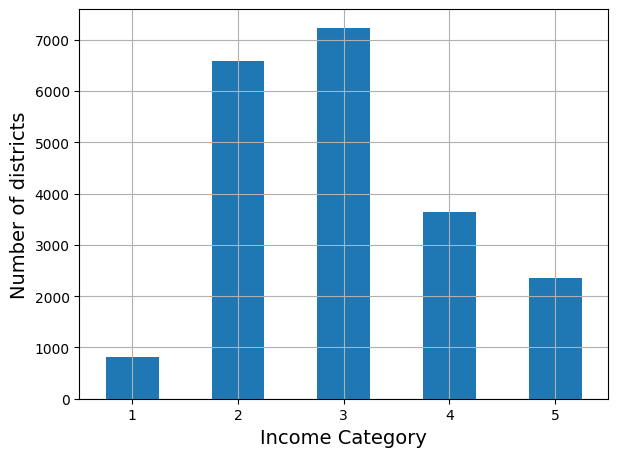

In [24]:
# Plot a bar chart of the 'income_cat' value counts, sorted by index
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0, grid=True)

# Set the x-label and y-label for the plot
plt.xlabel('Income Category')
plt.ylabel('Number of districts')

# Save the figure
save_fig('housing_income_cat_bar_plot')
# Show the plot
plt.show()

In [25]:
# Import StratifiedShuffleSplit for stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize StratifiedShuffleSplit with number of splits, test size, and random state
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

# Create an empty list to store stratified splits
strat_splits = []

# Perform stratified splitting
for train_index, test_index in splitter.split(housing, housing['income_cat']):
  # Get the stratified training and test sets for each split
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  # Append the splits to the list
  strat_splits.append((strat_train_set_n, strat_test_set_n))

In [26]:
# Select the first stratified split as the training and test sets
strat_train_set, strat_test_set = strat_splits[0]

In [27]:
# Perform stratified splitting using train_test_split with stratify parameter
strat_train_set , strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing['income_cat'], random_state=42)

In [28]:
# Calculate and display the proportions of income categories in the stratified test set
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [29]:
# extra code - computes the data for Figure 2-10

# Function to calculate income category proportions
def income_cat_proportions(data):
  return data['income_cat'].value_counts() / len(data)

# Split the housing data into training and test sets using random splitting
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# Create a DataFrame to compare income category proportions
compare_props = pd.DataFrame({
    'Overall %': income_cat_proportions(housing),
    'Stratified %': income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()

# Set the index name for the comparison DataFrame
compare_props.index.name = "income Category"

# Calculate the error percentage for stratified and random splitting compared to overall
compare_props['Strat. Error %'] = (compare_props['Stratified %'] / compare_props['Overall %'] - 1)
compare_props['Rand. Error %'] = (compare_props['Random %'] / compare_props['Overall %'] - 1)

# Display the comparison DataFrame with percentages rounded to 2 decimal places
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [30]:
# Drop the 'income_cat' column from both the stratified training and test sets
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis=1, inplace=True)

# **Discover and Visualize the Data to Gain Insights**

In [31]:
# Create a copy of the stratified training set to work with
housing = strat_train_set.copy()

In [32]:
# Display the first 5 rows of the housing DataFrame
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


#Visualizing Geographical Data

<function matplotlib.pyplot.show(close=None, block=None)>

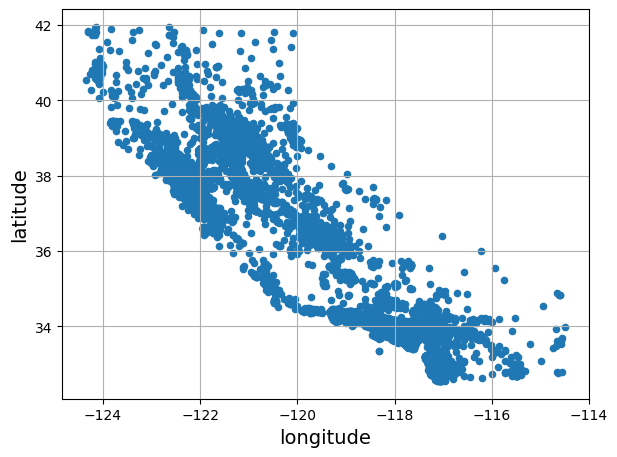

In [33]:
# Create a scatter plot of longitude vs. latitude
housing.plot(kind='scatter', x='longitude', y='latitude', grid=True)
save_fig('bad_visualization_plot') # extra code

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

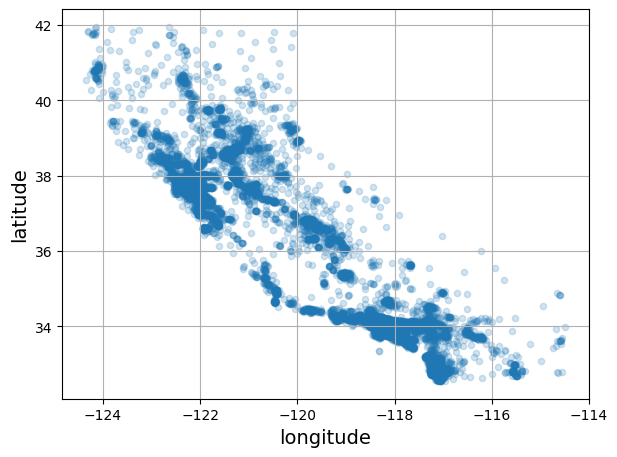

In [34]:
# Create a scatter plot of longitude vs. latitude with increased transparency
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2, grid=True)
save_fig('better_visualization_plot') # extra code

plt.show

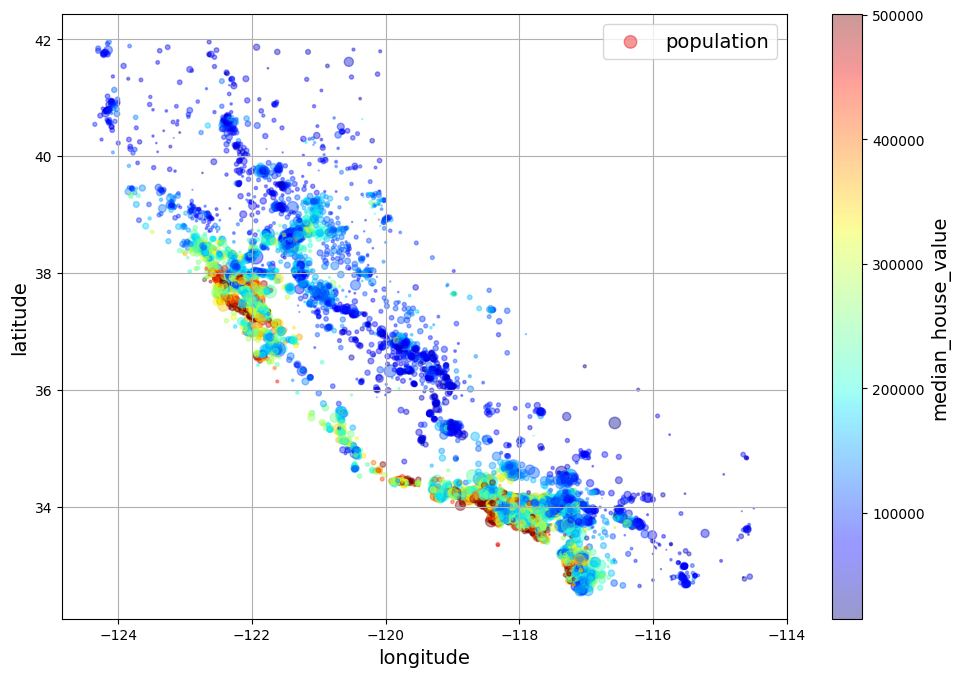

In [35]:
# Create a scatter plot of longitude vs. latitude showing population size and house value color
housing.plot(kind='scatter', x='longitude', y='latitude', grid = True,
             alpha=0.4, s=housing['population']/100, label='population',
             figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap('jet'),
             colorbar=True,legend=True, sharex=False)
save_fig("housing_prices_scatterplot") # extra code
plt.show()

In [36]:
# extra code - this cell generates the first figure in the chapter

# Download the California image
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
  homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
  url = homl3_root + "images/end_to_end_project/" + filename
  print('Downloading', filename)
  urllib.request.urlretrieve(url, IMAGES_PATH / filename)

In [37]:
# Rename columns for better readability in plots
housing_renamed = housing.rename(columns={
    "longitude": "Longitude",
    "latitude": "Latitude",
    "median_house_value": "Median house value (ᴜsᴅ)",
    "population": "Population"
})

<Axes: xlabel='Longitude', ylabel='Latitude'>

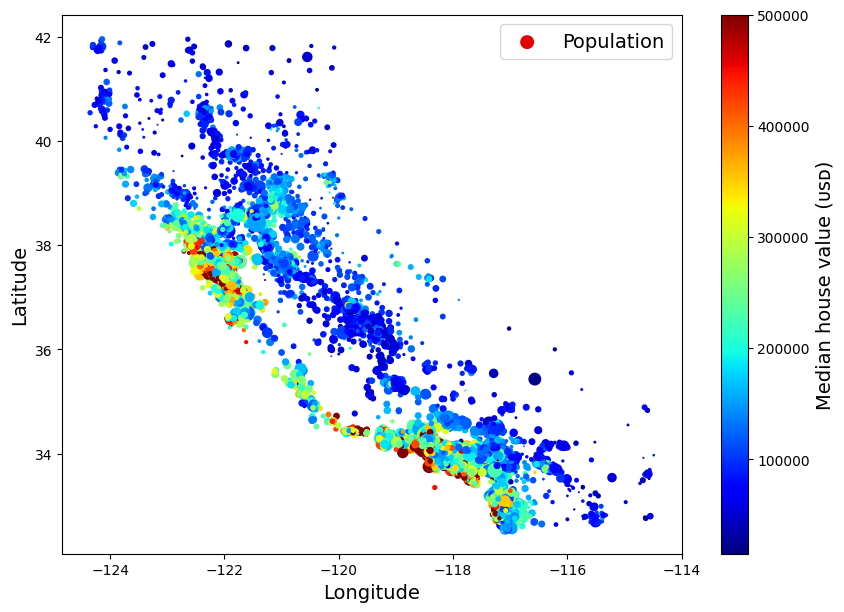

In [38]:
# Create a scatter plot of longitude vs. latitude with renamed columns
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

Text(92.7436803076565, 0.5, 'Latitude')

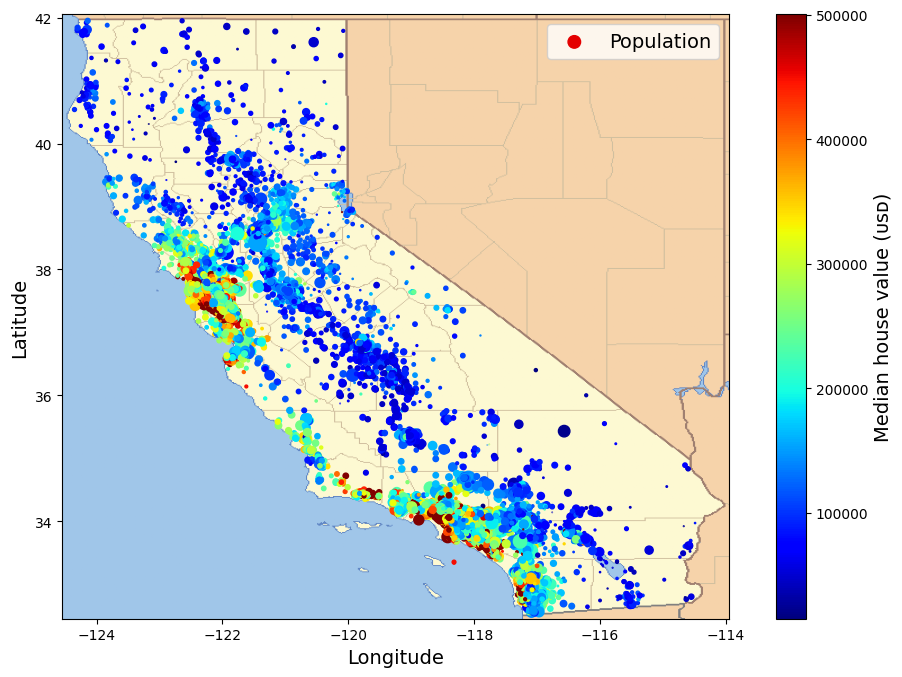

In [39]:
# Create a scatter plot of longitude vs. latitude with California image overlay
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

# Load the California image
california_img = plt.imread(IMAGES_PATH / filename)
# Define the axis limits for the image overlay
axis = -124.55, -113.95, 32.45, 42.05

# Set the axis limits and display the image
plt.axis(axis)
plt.imshow(california_img, extent=axis)
# Save the figure
save_fig("california_housing_prices_plot") # extra code
# Set x and y labels
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# **Looking for Correlations**

In [40]:
# Calculate the correlation matrix for numerical columns
corr_matrix = housing.corr(numeric_only=True)

In [41]:
# Display the correlation of each attribute with 'median_house_value', sorted in descending order
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


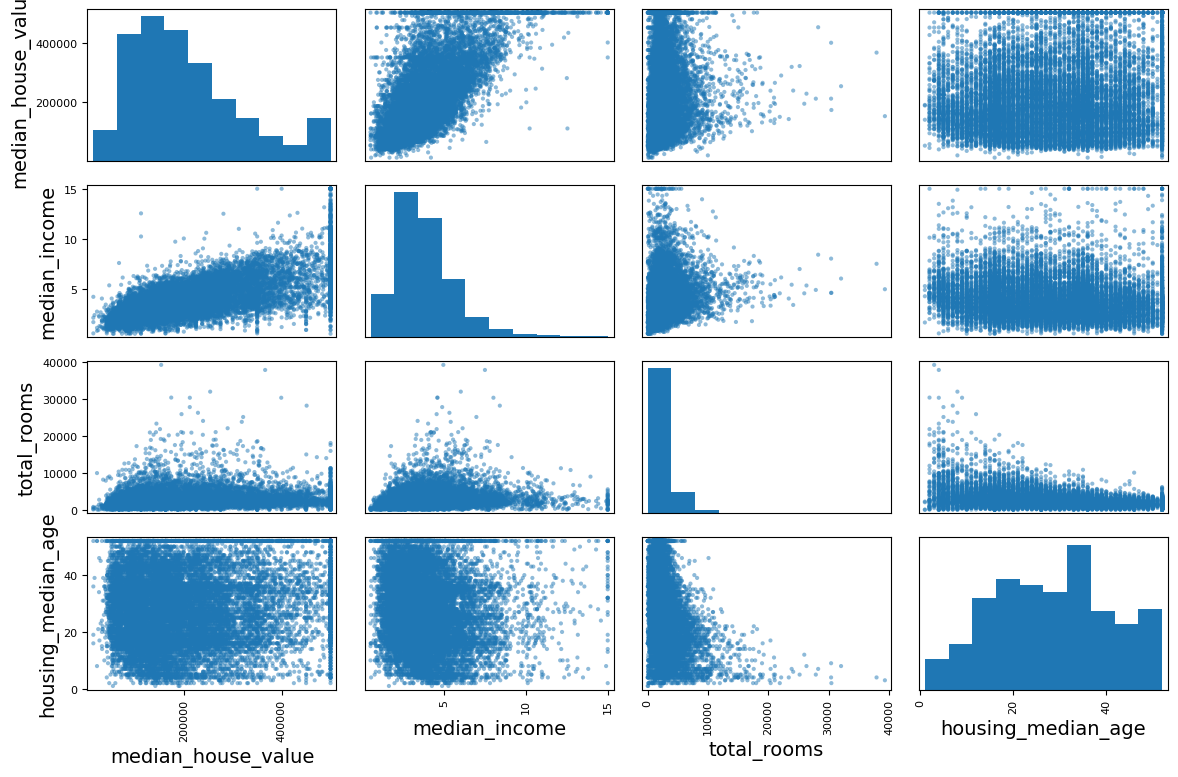

In [42]:
# Import scatter_matrix for creating scatter plots of multiple attributes
from pandas.plotting import scatter_matrix

# Define the attributes to include in the scatter matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
# Create a scatter matrix plot for the selected attributes
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot") # extra code
# Show the plot
plt.show()

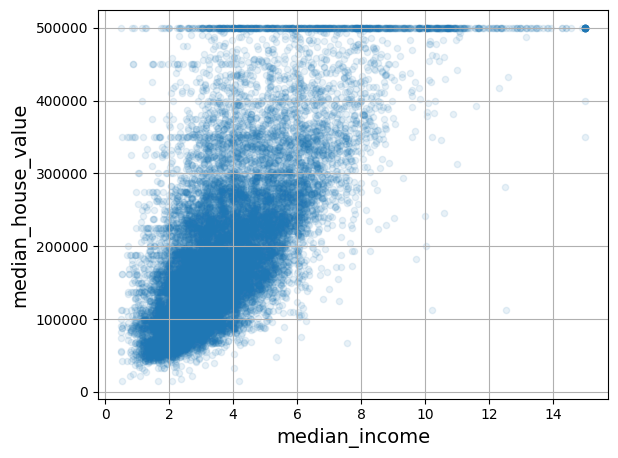

In [43]:
# Create a scatter plot of 'median_income' vs. 'median_house_value' with increased transparency
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1,grid=True)
save_fig('income_vs_house_value_scatterplot') # extra code
# Show the plot
plt.show()

# **Experimenting with Attribute Combinations**

In [44]:
# Create new attributes by combining existing ones to explore potential correlations
housing['rooms_per_house'] = housing['total_rooms'] / housing['households']
housing['bedrooms_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']
#

In [45]:
# Calculate the correlation matrix with the new attributes
corr_matrix = housing.corr(numeric_only=True)
# Display the correlation of each attribute with 'median_house_value', sorted in descending order
corr_matrix['median_house_value'].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


# **Prepare the Data for Machine Learning Algorithms**

In [46]:
# Separate features (housing) and labels (median_house_value) for training
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

# **Data Cleaning**

In the book 3 options are listed to handle the NaN values:

housing.dropna(subset=["total_bedrooms"], inplace=True)    # option 1

housing.drop("total_bedrooms", axis=1)       # option 2

median = housing["total_bedrooms"].median()  # option 3
housing["total_bedrooms"].fillna(median, inplace=True)
For each option, we'll create a copy of housing and work on that copy to avoid breaking housing. We'll also show the output of each option, but filtering on the rows that originally contained a NaN value.

In [47]:
# Identify rows with missing values
null_rows_idx = housing.isnull().any(axis=1)
# Display the head of rows with missing values
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [48]:
# Option 1: Drop rows with missing 'total_bedrooms'
housing_option1 = housing.copy()
housing_option1.dropna(subset=["total_bedrooms"], inplace=True)
# Display the head of rows that originally had missing values in the new DataFrame
housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [49]:
# Option 2: Drop the 'total_bedrooms' column
housing_option2 = housing.copy()
housing_option2.drop("total_bedrooms", axis=1, inplace=True)
# Display the head of rows that originally had missing values in the new DataFrame
housing_option2.loc[null_rows_idx].head()
#

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,375.0,183.0,9.8020,<1H OCEAN


In [50]:
# Option 3: Fill missing 'total_bedrooms' with the median
housing_option3 = housing.copy()
median = housing["total_bedrooms"].median()
housing_option3["total_bedrooms"].fillna(median, inplace=True)
# Display the head of rows that originally had missing values in the new DataFrame
housing_option3.loc[null_rows_idx].head()
#

/tmp/ipython-input-50-969501243.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing_option3["total_bedrooms"].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020,<1H OCEAN


In [51]:
# Import SimpleImputer for handling missing values
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with a median strategy to fill missing values
imputer = SimpleImputer(strategy='median')

In [52]:
# Select only the numerical columns from the housing DataFrame for imputation
housing_num = housing.select_dtypes(include=[np.number])

In [53]:
# Fit the imputer to the numerical housing data to calculate medians
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [54]:
# Display the calculated median values for each numerical attribute after fitting the imputer
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [55]:
# Display the median values of the numerical columns directly from the DataFrame
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [56]:
# Transform the numerical housing data using the fitted imputer to fill missing values
X = imputer.transform(housing_num)

In [57]:
# Display the names of the features the imputer was fitted on
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [58]:
# Create a pandas DataFrame from the transformed data with original column names and index
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [59]:
# Display the head of the transformed DataFrame for rows that originally had missing values
housing_tr.loc[null_rows_idx].head()
#

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [60]:
# Display the strategy used by the imputer
imputer.strategy

'median'

In [61]:
# Create a pandas DataFrame from the transformed data with original column names and index
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [62]:
# Display the head of the transformed DataFrame for rows that originally had missing values
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


In [63]:
# from sklearn import set_config

# set_config(transform_output='pandas') # scikit -learn>= 1.2

In [64]:
# Import IsolationForest for outlier detection
from sklearn.ensemble import IsolationForest

# Initialize IsolationForest with a random state for reproducibility
isolation_forest = IsolationForest(random_state=42)
# Fit the IsolationForest model and predict outliers
outlier_pred = isolation_forest.fit_predict(X)

In [65]:
# Display the outlier predictions (-1 for outliers, 1 for inliers)
outlier_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [66]:
# extra code - commented out because we're not removing outliers in this notebook

# Filter the housing and housing_labels DataFrames to remove outliers
# housing = housing.loc[outlier_pred == 1]
# housing_labels = housing_labels.loc[outlier_pred == 1]

# **Handling Text and Categorical Attributes**

In [67]:
# Now let's preprocess the categorical input feature, ocean_proximity :

In [68]:
# Select the 'ocean_proximity' column for categorical feature handling
housing_cat = housing[['ocean_proximity']]
# Display the head of the selected categorical data
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [69]:
# Import OrdinalEncoder for encoding categorical features as numerical ordinals
from sklearn.preprocessing import OrdinalEncoder

# Initialize OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
# Fit and transform the categorical data using OrdinalEncoder
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Display the ordinal encoded categorical features
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [70]:
# Display the categories learned by the OrdinalEncoder
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [71]:
# Import OneHotEncoder for one-hot encoding categorical features
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
cat_encoder = OneHotEncoder()
# Fit and transform the categorical data using OneHotEncoder
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [72]:
# Display the one-hot encoded categorical features (sparse matrix format)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [73]:
# Convert the sparse one-hot encoded matrix to a dense NumPy array
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [74]:
# Initialize OneHotEncoder with sparse_output=False to get a dense NumPy array
cat_encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the categorical data using OneHotEncoder
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# Display the one-hot encoded categorical features (dense NumPy array)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [75]:
# Display the categories learned by the OneHotEncoder
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [76]:
# Create a sample DataFrame for testing get_dummies
df_test = pd.DataFrame({"ocean_proximity": ['INLAND', 'NEAR BAY']})
# Apply pandas get_dummies for one-hot encoding
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [77]:
# Transform the test DataFrame using the fitted OneHotEncoder
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [78]:
# Create a sample DataFrame with unknown categories for testing get_dummies
df_test_unknown = pd.DataFrame({"ocean_proximity": ['<2H OCEAN', 'ISLAND']})
# Apply pandas get_dummies to the DataFrame with unknown categories
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [79]:
# Set handle_unknown to 'ignore' to handle unknown categories during transformation
cat_encoder.handle_unknown = 'ignore'
# Transform the DataFrame with unknown categories using the fitted OneHotEncoder
cat_encoder.transform(df_test_unknown)
#

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [80]:
# Transform the DataFrame with unknown categories using the fitted OneHotEncoder
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [81]:
# Display the names of the features the OneHotEncoder was fitted on
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [82]:
# Display the output feature names generated by the OneHotEncoder
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [83]:
# Create a pandas DataFrame from the transformed data with output feature names and original index
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [84]:
# Display the resulting DataFrame after one-hot encoding with unknown categories handled
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


# **Feature Scaling**

In [85]:
# Import MinMaxScaler for min-max scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler to scale data to the range [-1, 1]
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

# Apply min-max scaling to the numerical housing data
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [86]:
# Import StandardScaler for standardization
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
std_scaler = StandardScaler()

# Apply standardization to the numerical housing data
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

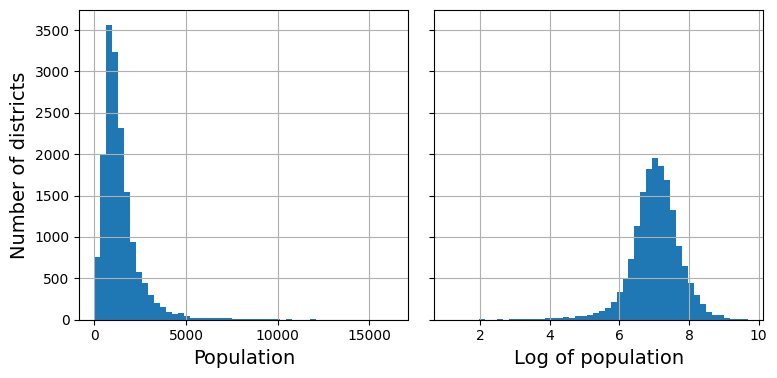

In [87]:
# extra code - this cell generate Figure 2 -17

fig, axs = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
housing['population'].hist(ax=axs[0], bins=50)
housing['population'].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel('Population')
axs[1].set_xlabel('Log of population')
axs[0].set_ylabel('Number of districts')
axs[0].grid(True)
axs[1].grid(True)
save_fig('long_tail_plot') # extra code
plt.show()
#

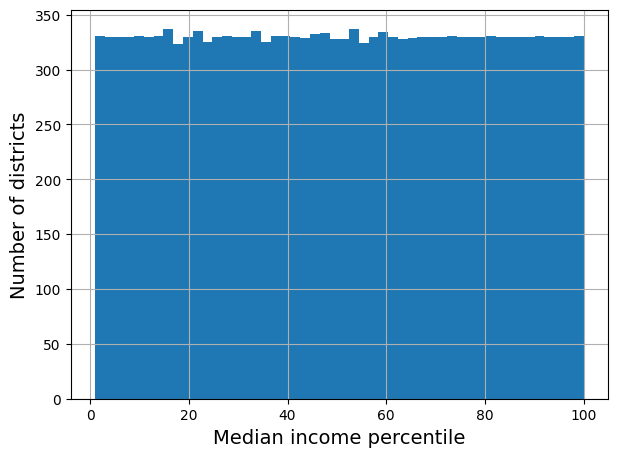

In [88]:
# extra code - just shows that we get a uniform distribution
percentiles = [np.percentile(housing['median_income'], p)
               for p in range(1, 100)]

flattened_median_income = pd.cut(housing['median_income'],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels = range(1, 100 + 1))

flattened_median_income.hist(bins=50)

plt.xlabel('Median income percentile')

plt.ylabel('Number of districts')

plt.grid(True)

save_fig('percentile_plot') # extra code

plt.show()

In [89]:
# Import rbf_kernel for calculating Radial Basis Function kernel similarity
from sklearn.metrics.pairwise import rbf_kernel

# Calculate the RBF kernel similarity for housing_median_age centered around 35 with gamma=0.1
age_simil_35 = rbf_kernel(housing[['housing_median_age']], [[35]], gamma=0.1)

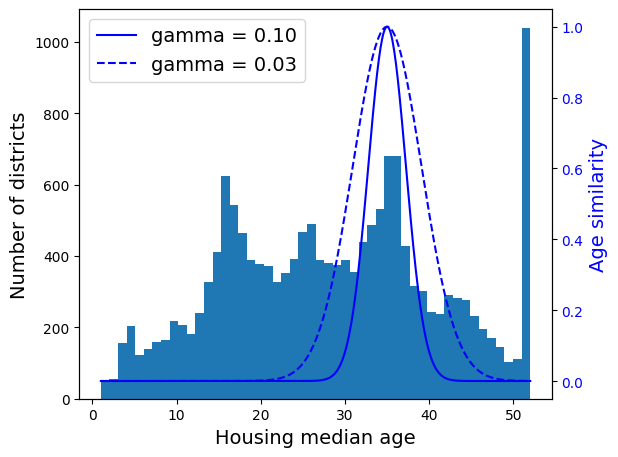

In [90]:
# extra code – this cell generates Figure 2–18


ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)

gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)


fig, ax1 = plt.subplots()


ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)


ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)


plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

In [91]:
# Import LinearRegression model
from sklearn.linear_model import LinearRegression

# Initialize a StandardScaler for scaling the target variable (median_house_value)
target_scaler = StandardScaler()

# Scale the housing labels (median_house_value)
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# Initialize a LinearRegression model
model = LinearRegression()

# Train the LinearRegression model on the median_income feature and scaled labels
model.fit(housing[["median_income"]], scaled_labels)

# Select the first 5 rows of median_income as new data for prediction
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

# Predict the scaled labels for the new data
scaled_predictions = model.predict(some_new_data)

# Inverse transform the scaled predictions to get predictions in the original scale
predictions = target_scaler.inverse_transform(scaled_predictions)

In [92]:
# Display the inverse transformed predictions
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

In [93]:
# Import TransformedTargetRegressor for transforming the target variable before fitting a regressor
from sklearn.compose import TransformedTargetRegressor

# Initialize TransformedTargetRegressor with LinearRegression as the regressor and StandardScaler as the transformer
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

# Train the model on the median_income feature and original housing labels (the transformer will handle scaling)
model.fit(housing[["median_income"]], housing_labels)

# Predict the median_house_value for the new data (the transformer will handle inverse scaling)
predictions = model.predict(some_new_data)

In [94]:
# Display the predictions from the TransformedTargetRegressor model
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

# **Custom Transformers**

To create simple transformers:

In [95]:
from sklearn.preprocessing import FunctionTransformer

# Initialize a FunctionTransformer for applying logarithm with inverse exponential function
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
# Apply the log transformation to the 'population' column
log_pop = log_transformer.transform(housing[['population']])

In [96]:
# Initialize a FunctionTransformer for applying RBF kernel with specified parameters
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
# Apply the RBF kernel transformation to the 'housing_median_age' column
age_simil_35 = rbf_transformer.transform(housing[['housing_median_age']])

In [97]:
# Display the transformed age similarity values
age_simil_35

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]])

In [98]:
# Define the coordinates for San Francisco
sf_coords = 37.7749, -122.41
# Initialize a FunctionTransformer for applying RBF kernel centered at San Francisco coordinates
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords], gamma=0.1))
# Apply the RBF kernel transformation to the 'latitude' and 'longitude' columns
sf_simil = sf_transformer.transform(housing[['latitude', 'longitude']])

In [99]:
# Display the transformed San Francisco similarity values
sf_simil

array([[0.999927  ],
       [0.05258419],
       [0.94864161],
       ...,
       [0.00388525],
       [0.05038518],
       [0.99868067]])

In [100]:
# Initialize a FunctionTransformer for calculating the ratio of the first and second columns
ration_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:,[1]])
# Apply the ratio transformation to a sample NumPy array
ration_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [101]:
# Import BaseEstimator and TransformerMixin for creating custom transformers
from sklearn.base import BaseEstimator, TransformerMixin
# Import check_array and check_is_fitted for input validation
from sklearn.utils.validation import check_array, check_is_fitted

In [102]:
# Define a custom transformer class that clones the functionality of StandardScaler
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean = with_mean

    def fit(self, X, y=None):
        # Validate the input array
        X = check_array(X)
        # Calculate the mean and standard deviation of the input
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        # Store the number of features
        self.n_features_in_ = X.shape[1]
        return self

    def transform(self, X):
        # Check if the transformer has been fitted
        check_is_fitted(self)
        # Validate the input array
        X = check_array(X)
        # Assert that the number of features matches the fitted data
        assert self.n_features_in_ == X.shape[1]
        # Subtract the mean if with_mean is True
        if self.with_mean:
            X = X - self.mean_
        # Scale the data by the standard deviation
        return X / self.scale_

In [103]:
from sklearn.cluster import KMeans

# Define a custom transformer class for calculating cluster similarity
class ClusterSimilarity(BaseEstimator, TransformerMixin):
  def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
    self.n_clusters = n_clusters
    self.gamma = gamma
    self.random_state = random_state

  def fit(self, X, y=None, sample_weight=None):
    # Initialize KMeans with specified number of clusters and random state
    self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                          random_state=self.random_state)
    # Fit KMeans to the input data with optional sample weights
    self.kmeans_.fit(X, sample_weight=sample_weight)
    return self


  def transform(self, X):
    # Calculate the RBF kernel similarity between input data and cluster centers
    return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)



  def get_feature_names_out(self, names=None):
    # Generate output feature names based on the number of clusters
    return [f'Cluster {i} similarity' for i in range(self.n_clusters)]

In [104]:
# Initialize ClusterSimilarity with specified parameters
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1.0, random_state=42)
# Fit and transform the latitude and longitude data using ClusterSimilarity with housing labels as sample weights
similarities = cluster_simil.fit_transform(housing[['latitude', 'longitude']],
                                           sample_weight = housing_labels)

In [105]:
# Display the first 3 rows of the similarity matrix, rounded to 2 decimal places
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

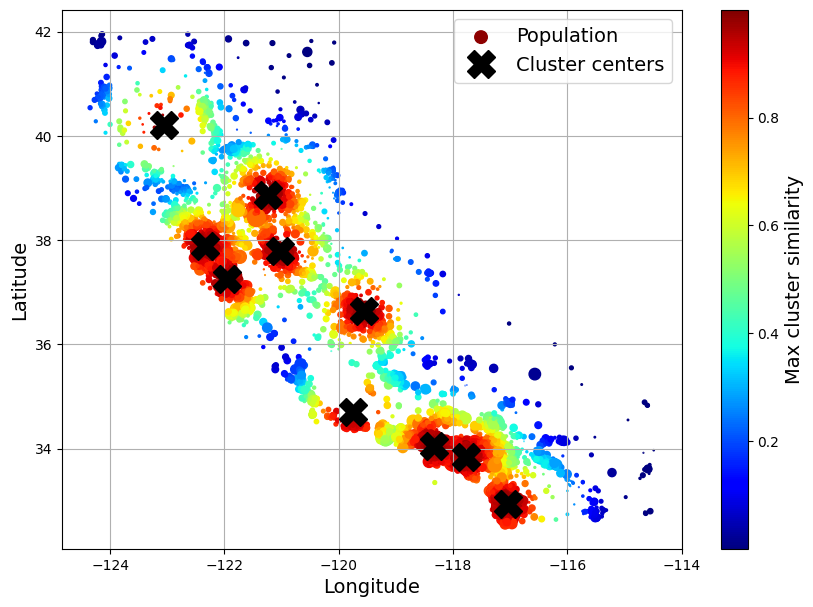

In [106]:
# extra code - this cell generates Figure 2-19

# Rename columns for better readability in plots
housing_renamed = housing.rename(columns={'latitude': 'Latitude',"longitude": "Longitude",
                                          "population":"Population","median_house_value":"Median House Value (USD)"})
# Add a new column for the maximum cluster similarity
housing_renamed['Max cluster similarity'] = similarities.max(axis=1)

# Create a scatter plot of longitude vs. latitude showing population size and max cluster similarity
housing_renamed.plot(kind='scatter', x='Longitude', y="Latitude", grid = True,
                     s=housing_renamed['Population'] / 100, label='Population',
                     c='Max cluster similarity', cmap='jet', colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))

# Plot the cluster centers on the scatter plot
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color='black', marker="X", markersize=20,
         label='Cluster centers')

# Set the legend location
plt.legend(loc='upper right')
# Set x and y labels
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the legend
plt.legend()

# **Transformation Pipelines**

In [107]:
from sklearn.pipeline import Pipeline

# Create a pipeline for numerical features including imputation and standardization
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('standardize', StandardScaler()),
])

In [108]:
from sklearn.pipeline import make_pipeline

# Create a pipeline for numerical features using make_pipeline for conciseness
num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                            StandardScaler())

In [109]:
from sklearn import set_config

# Set the display configuration for scikit-learn pipelines to 'diagram' for visualization
set_config(display='diagram')

# Display the numerical pipeline
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [110]:
# Fit and transform the numerical housing data using the numerical pipeline
housing_num_prepared = num_pipeline.fit_transform(housing_num)

# Display the first 2 rows of the prepared numerical data, rounded to 2 decimal places
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [111]:
# Define a function to monkey patch get_feature_names_out for older scikit-learn versions
def monkey_patch_get_signature_names_out():

  '''Monkey patch some classes which did not handle get _feature_namme_out()
  correctly. in Scikit-learn 1.0.*'''

  from inspect import Signature, signature, Parameter
  import pandas as pd
  from sklearn.impute import SimpleImputer
  from sklearn.pipeline import make_pipeline, Pipeline
  from sklearn.preprocessing import FunctionTransformer, StandardScaler

  default_get_feature_names_out = StandardScaler.get_feature_names_out

  if not hasattr(SimpleImputer, "get_feature_names_out"):
    print("Monkey patching SimpleImputer.get_feature_names_out()")
    SimpleImputer.get_feature_names_out = default_get_feature_names_out

  if not hasattr(FunctionTransformer, "get_feature_names_out"):
    print("Monkey patching FunctionTransformer.get_feature_names_out()")
    orig_init = FunctionTransformer.__init__
    orig_sig = signature(orig_init)

    def __init__(*args, feature_names_out=None, **kwargs):
      orig_sig.bind(*args, **kwargs)
      orig_init(*args, **kwargs)
      orig_sig.feature_names_out = feature_names_out

    __init__.__signature__ = signature(
        list(signature(orig_init).parameters.values()) + [
            Parameter("feature_names_out", Parameter.KEYWORD_ONLY)
        ]
    )
    def get_feature_names_out(self, names=None):
      if callable(self.feature_names_out):
        return self.feature_names_out(self, names)
      assert self.feature_names_out == 'one-to-one'
      return default_get_feature_names_out(self, names)

    FunctionTransformer.__init__ = __init__
    FunctionTransformer.get_feature_names_out = get_feature_names_out

In [112]:
# Execute the monkey patching function
monkey_patch_get_signature_names_out()

In [113]:
# Create a pandas DataFrame from the prepared numerical data with feature names from the pipeline and original index
df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [114]:
# Display the head of the prepared numerical DataFrame
df_housing_num_prepared.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942


In [115]:
# Display the steps in the numerical pipeline
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [116]:
# Access the second step (StandardScaler) in the numerical pipeline
num_pipeline[1]

StandardScaler()

In [117]:
# Access all steps except the last one in the numerical pipeline
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [118]:
# Access the 'simpleimputer' step in the numerical pipeline by name
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [119]:
# Set the strategy parameter of the 'simpleimputer' step in the numerical pipeline
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [120]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

In [121]:
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

In [122]:
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [123]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [124]:
housing_prepared = preprocessing.fit_transform(housing)

In [125]:
# extra code - shows that we can get a Dataframe out if we want
housing_prepared_df = pd.DataFrame(housing_prepared,
                                  columns=preprocessing.get_feature_names_out(),
                                  index=housing.index)
housing_prepared_df.head(2)
#

,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-2__ocean_proximity_<1H OCEAN,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0


In [126]:
def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

In [127]:
def ratio_name(function_transformer, feature_names_in):

  return ['ratio'] # feature names out

In [128]:
def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy="median"),
      FunctionTransformer(column_ratio,
                          feature_names_out=ratio_name),
      StandardScaler())

In [129]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())

In [130]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)

In [131]:
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())

In [132]:
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [133]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [134]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

# **Select and Train a Model**

**Training and Evaluating on the Training Set**

In [135]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x786...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7867f3d86610>)])),
                ('linearregression', LinearRegression())])

In [136]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2) # -2 = rounded to the nearest hundred

array([242800., 375900., 127500.,  99400., 324600.])

In [137]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [138]:
# extra code - computes the error ratios discussed in the book
error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values -1

print(', '.join([f'{100 * ratio: .1f}%' for ratio in error_ratios]))

-47.0%, -22.3%,  25.4%,  3.4%, -10.3%


In [139]:
try:
  from sklearn.metrics import root_mean_squared_error
except ImportError:
  from sklearn.metrics import mean_squared_error

  def root_mean_squared_error(labels, predictions):
    return mean_squared_error(labels, predictions, squared=False)


lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

68647.95686706658

In [140]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x786...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7867f3d86610>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [141]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse
#

0.0

# **Better Evaluation Using Cross-Validation**

In [142]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [143]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,66366.983603
std,1976.844743
min,63557.655007
25%,65004.623899
50%,65886.897085
75%,68129.026040
max,69530.301101


In [144]:
# extra code - compute the error stats for the linear model
lin_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                             scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

,0
count,10.000000
mean,69847.923224
std,4078.407329
min,65659.761079
25%,68088.799156
50%,68697.591463
75%,69800.966364
max,80685.254832


In [145]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [146]:
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,46938.209246
std,1018.397196
min,45522.649195
25%,46291.334639
50%,47021.703303
75%,47321.521991
max,49140.832210


In [147]:
forest_reg.fit(housing, housing_labels)
housing_predictions = forest_reg.predict(housing)
forest_rmse = root_mean_squared_error(housing_labels, housing_predictions)
forest_rmse


17521.565358779884

# **Fine - Tune Your Model**

**Grid Search**

In [150]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

In [151]:
param_grid = [
    {'preprocessing__geo__n_clusters':[5, 8, 10],
     'random_forest__max_features':[4, 6, 8]},
    {'preprocessing__geo__n_clusters':[10, 15],
     'random_forest__max_features':[6, 8, 10]},
]


In [152]:
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7867f3d86610>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [153]:
# extra code - shows part of the output of get_params().keys()
print(str(full_pipeline.get_params().keys())[:100] + "....")

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'preprocessing', 'random_forest', 'prepr....


In [154]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [155]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7867f14...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7867f3f19f90>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [156]:
cv_res = pd.DataFrame(grid_search.cv_results_)

cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)



In [157]:
# extra code - these few lines of code just make the DataFrame look nicer
cv_res = cv_res[['param_preprocessing__geo__n_clusters',
                 'param_random_forest__max_features','split0_test_score',
                 'split1_test_score','split2_test_score','mean_test_score']]

In [158]:
score_cols = ['split0','split1','split2','mean_test_rmse']

In [159]:
cv_res.columns = ['n_clusters', 'max_features'] + score_cols

In [160]:
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,43007,43683,44158,43616
13,15,8,43697,44011,44819,44176
7,10,6,43710,44133,45227,44356
9,10,6,43710,44133,45227,44356
6,10,4,43798,44233,45100,44377


# **Randomized Search**

In [161]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [163]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'random_forest__max_features': randint(low=2, high=20),
}

In [164]:
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs,
                                n_iter=10, cv=3, scoring='neg_root_mean_squared_error',
                                random_state=42)

In [165]:
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7867f61cf710>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7867f609a310>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [166]:
# extra code – displays the random search results
cv_res = pd.DataFrame(rnd_search.cv_results_)

In [167]:
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

In [168]:
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]

In [169]:
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41224,42385,42712,42107
8,32,7,41374,42579,43230,42394
0,41,16,42397,42640,43175,42738
5,42,4,41874,43348,43690,42971
2,23,8,42421,43138,43585,43048


In [170]:
# extra code – plots a few distributions you can use in randomized search

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

(np.float64(0.0), np.float64(7.0), np.float64(0.0), np.float64(1.0))

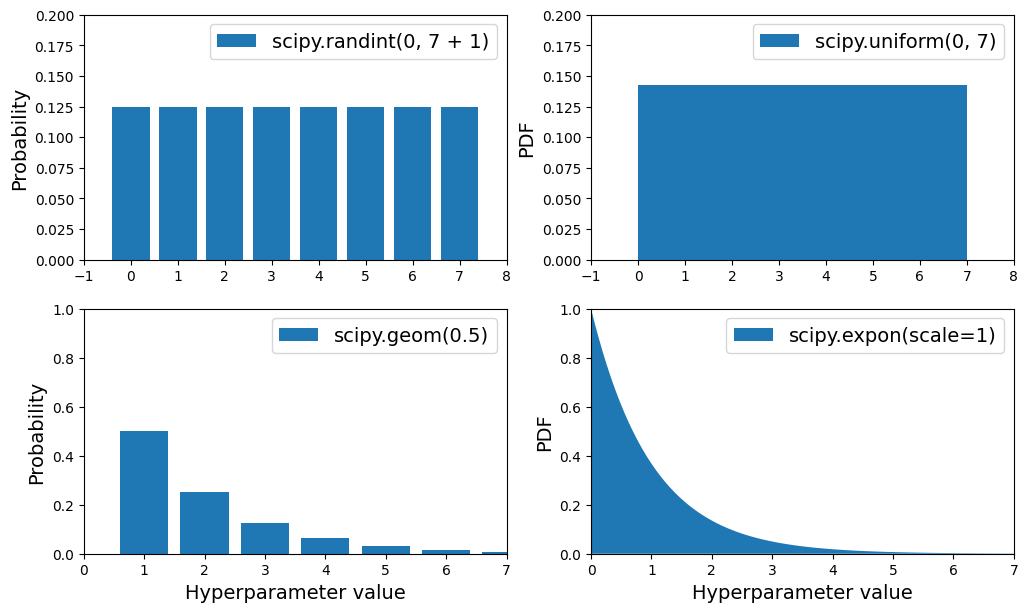

In [171]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

In [172]:
# extra code – shows the difference between expon and loguniform

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

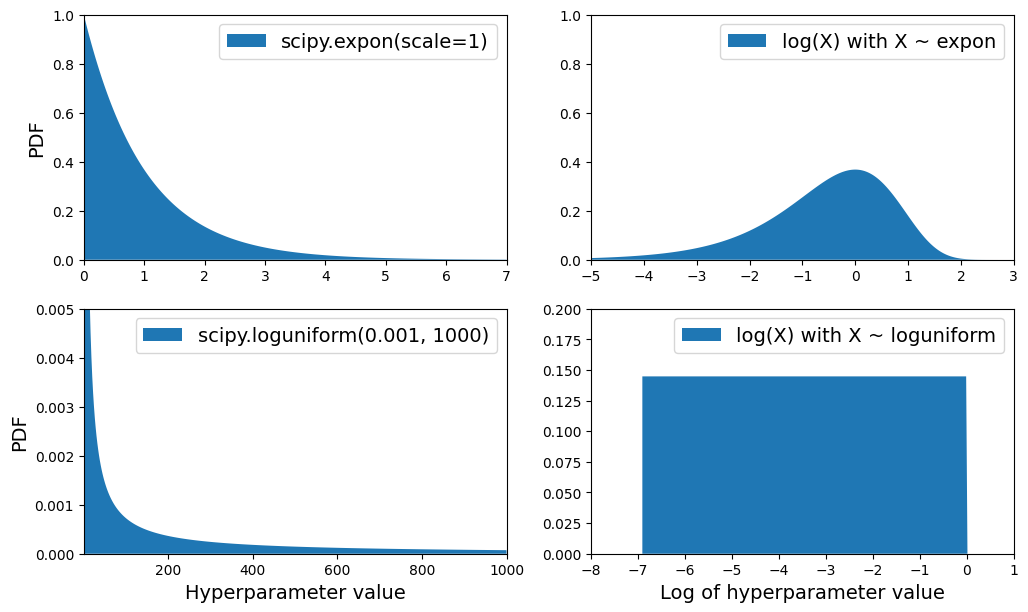

In [173]:
plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()